### Import Module

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

### Check Data

In [2]:
df = pd.read_csv("application_train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

1. Untuk feature/column AMT_INCOME_TOTAL & AMT_CREDIT, hitung dan beri penjelasan (insight) terkait:
   a. Titik Pusat Data (Central Tendency)
   b. Persebaran Data (Dispersion)
   c. Distribusi Data (Distribution

### Pembersihan data AMT_INCOME_TOTAL

In [9]:
df_amt_cleaned = df['AMT_INCOME_TOTAL'].dropna()

In [10]:
df_amt_cleaned.isna().sum()

0

In [11]:
#Titik Pusat Data (Central Tendency) AMT_INCOME_TOTAL
mean_amt_it=df_amt_cleaned.mean()
median_amt_it=df_amt_cleaned.median()
mode_amt_it=df_amt_cleaned.mode()[0]

print('Nilai titik tengah (Mean) AMT_INCOME_TOTAL adalah', mean_amt_it)
print('Nilai titik tengah (Median) AMT_INCOME_TOTAL adalah', median_amt_it)
print('Nilai titik tengah (Mode) AMT_INCOME_TOTAL adalah', mode_amt_it)

Nilai titik tengah (Mean) AMT_INCOME_TOTAL adalah 168797.9192969845
Nilai titik tengah (Median) AMT_INCOME_TOTAL adalah 147150.0
Nilai titik tengah (Mode) AMT_INCOME_TOTAL adalah 135000.0


In [12]:
#INSIGHT Titik Pusat Data (Central Tendency) AMT_INCOME_TOTAL: Mengetahui bahwa urutan dari nilai dari yang terkecil ke yang terbesar adalah mode<median<mean, maka menunjukkan bahwa data mempunyai bentuk Positive Skew

### Pengecekan Data AMT_CREDIT

In [13]:
df['AMT_CREDIT'].isna().sum()

0

### Soal No 1

In [14]:
#Titik Pusat Data (Central Tendency) AMT_CREDIT
mean_amt_cr=df['AMT_CREDIT'].mean()
median_amt_cr=df['AMT_CREDIT'].median()
mode_amt_cr=df['AMT_CREDIT'].mode()[0]


print('Nilai titik tengah (Mean) AMT_CREDIT adalah', mean_amt_cr)
print('Nilai titik tengah (Median) AMT_CREDIT adalah', median_amt_cr)
print('Nilai titik tengah (Mode) AMT_CREDIT adalah', mode_amt_cr)

Nilai titik tengah (Mean) AMT_CREDIT adalah 599025.9997057016
Nilai titik tengah (Median) AMT_CREDIT adalah 513531.0
Nilai titik tengah (Mode) AMT_CREDIT adalah 450000.0


In [15]:
print('Skew AMT_INCOME_TOTAL:',stats.skewtest(df_amt_cleaned))
print('Skew AMT_CREDIT:',stats.skewtest(df['AMT_CREDIT']))

Skew AMT_INCOME_TOTAL: SkewtestResult(statistic=1269.2229361102025, pvalue=0.0)
Skew AMT_CREDIT: SkewtestResult(statistic=222.1102888947687, pvalue=0.0)


In [16]:
#INSIGHT Titik Pusat Data (Central Tendency) AMT_CREDIT: Mengetahui bahwa urutan dari nilai dari yang terkecil ke yang terbesar adalah mode<median<mean, maka menunjukkan bahwa data mempunyai bentuk Positive Skew, selain itu juga dikarenakan nilai skew yang besar dalam memilih titik central tendency lebih baik menggunakan median karena median lebih reliable dalam figur skew dan juga lebih kuat untuk menghadapi data outlier

In [17]:
#Persebaran Data (Dispersion) AMT_INCOME_TOTAL Using Median & IQR
q1_amt_it = df_amt_cleaned.quantile(0.25)
q3_amt_it = df_amt_cleaned.quantile(0.75)
iqr_amt_it = q3_amt_it - q1_amt_it

print('Nilai atas dari data AMT_INCOME_TOTAL adalah', q3_amt_it)
print('Nilai tengah (Median) dari data AMT_INCOME_TOTAL adalah', median_amt_it)
print('Nilai bawah data AMT_INCOME_TOTAL adalah', q1_amt_it)
print('NIlai IQR data AMT_INCOME_TOTAL adalah', iqr_amt_it)

Nilai atas dari data AMT_INCOME_TOTAL adalah 202500.0
Nilai tengah (Median) dari data AMT_INCOME_TOTAL adalah 147150.0
Nilai bawah data AMT_INCOME_TOTAL adalah 112500.0
NIlai IQR data AMT_INCOME_TOTAL adalah 90000.0


In [18]:
#INSIGHT: Diketahui bahwa terdapat terdapat variansi yang cukup besar pada data AMT_INCOME_TOTAL yaitu dengan membandingkan data IQR dengan Median

In [19]:
#Persebaran Data (Dispersion) AMT_CREDIT Using Median & IQR
q1_amt_cr = df['AMT_CREDIT'].quantile(0.25)
q3_amt_cr = df['AMT_CREDIT'].quantile(0.75)
iqr_amt_cr = q3_amt_cr - q1_amt_cr
upper_whisker_amt_cr = q3_amt_cr + (1.5* iqr_amt_cr)
bottom_whisker_amt_cr = q1_amt_cr - (1.5* iqr_amt_cr)

print('Nilai atas dari data AMT_CREDIT adalah', q3_amt_cr)
print('Nilai tengah (Median) dari data AMT_CREDIT adalah', median_amt_cr)
print('Nilai bawah data AMT_CREDIT adalah', q1_amt_cr)
print('NIlai IQR data AMT_CREDIT adalah', iqr_amt_cr)

Nilai atas dari data AMT_CREDIT adalah 808650.0
Nilai tengah (Median) dari data AMT_CREDIT adalah 513531.0
Nilai bawah data AMT_CREDIT adalah 270000.0
NIlai IQR data AMT_CREDIT adalah 538650.0


In [20]:
#INSIGHT: Diketahui bahwa terdapat terdapat variansi yang kecil pada data AMT_INCOME_TOTAL yaitu dengan membandingkan data IQR dengan Median

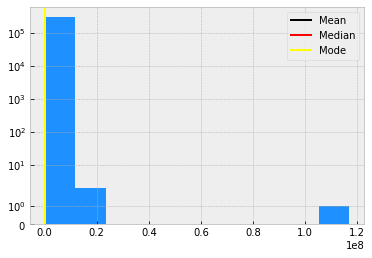

skew: SkewtestResult(statistic=1269.2229361102025, pvalue=0.0)


In [21]:
#Distribusi Data AMT_INCOME_TOTAL
plt.style.use('bmh')
plt.hist(df_amt_cleaned,color='dodgerblue')
plt.yscale('symlog')
plt.xscale('linear')
plt.axvline(x= mean_amt_it, color ='black', label = 'Mean')
plt.axvline(x= median_amt_it, color ='red', label = 'Median')
plt.axvline(x= mode_amt_it, color ='yellow', label = 'Mode')
plt.legend()
plt.show()
print('skew:',stats.skewtest(df_amt_cleaned))

In [22]:
#INSIGHT : Terbukti secara visualiasi bahwa data sangat skew secara positif dan sehingga pemilihan central tendency terbaik adalah median

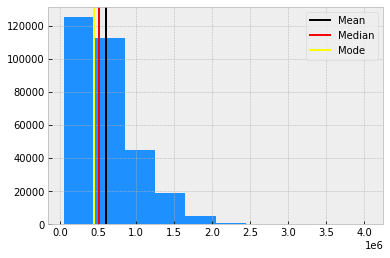

skew: SkewtestResult(statistic=222.1102888947687, pvalue=0.0)


In [23]:
#Distribusi Data AMT_CREDIT
plt.style.use('bmh')
plt.hist(df['AMT_CREDIT'],color='dodgerblue')
plt.yscale('linear')
plt.xscale('linear')
plt.axvline(x= mean_amt_cr, color ='black', label = 'Mean')
plt.axvline(x= median_amt_cr, color ='red', label = 'Median')
plt.axvline(x= mode_amt_cr, color ='yellow', label = 'Mode')
plt.legend()
plt.show()
print('skew:',stats.skewtest(df['AMT_CREDIT']))

In [24]:
#INSIGHT : Terbukti secara visualiasi bahwa data sangat skew secara positif dan sehingga pemilihan central tendency terbaik adalah median

### Soal 2

In [25]:
#Pengecekkan Data
df['DAYS_EMPLOYED'].isna().sum()

0

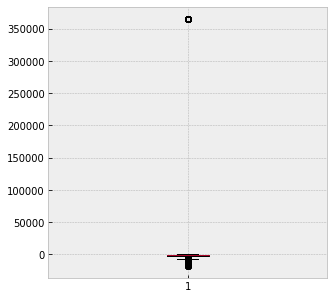

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
plt.boxplot(df['DAYS_EMPLOYED'])
plt.show()

In [27]:
q1_de = df['DAYS_EMPLOYED'].quantile(0.25)
q2_de = df['DAYS_EMPLOYED'].quantile(0.50)
q3_de = df['DAYS_EMPLOYED'].quantile(0.75)
iqr_de = q3_de - q1_de
low_whisker_de = q1_de - 1.5*iqr_de
upper_whisker_de = q3_de + 1.5*iqr_de
print('Nilai tengah dari feature Distance adalah', q2_de)
print('Nilai bawah dari feature Distance adalah', q1_de)
print('Nilai atas dari feature Distance adalah', q3_de)
print('Dengan Low Whisker', low_whisker_de ,'dan upper whisker', upper_whisker_de)

Nilai tengah dari feature Distance adalah -1213.0
Nilai bawah dari feature Distance adalah -2760.0
Nilai atas dari feature Distance adalah -289.0
Dengan Low Whisker -6466.5 dan upper whisker 3417.5


In [28]:
outliers_distance_de = df[(df['DAYS_EMPLOYED'] > upper_whisker_de) | (df['DAYS_EMPLOYED'] < low_whisker_de)]['DAYS_EMPLOYED']
outliers_distance_de

8         365243
11        365243
18         -7804
23        365243
38        365243
           ...  
307502     -8736
307504     -7258
307505    365243
307507    365243
307508     -7921
Name: DAYS_EMPLOYED, Length: 72217, dtype: int64

In [29]:
#Pada umumnya nilai 'DAYS_EMPLOYED' adalah -2760 hingga -289 tetapi terdapat banyak data outlier sebesar 72217 data

### Soal 3

In [30]:
df['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

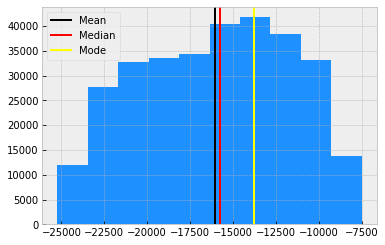

skew: SkewtestResult(statistic=222.1102888947687, pvalue=0.0)


In [31]:
#Distribusi Data DAYS_BIRTH
plt.style.use('bmh')
plt.hist(df['DAYS_BIRTH'],color='dodgerblue')
plt.yscale('linear')
plt.xscale('linear')
plt.axvline(x= df['DAYS_BIRTH'].mean(), color ='black', label = 'Mean')
plt.axvline(x= df['DAYS_BIRTH'].median(), color ='red', label = 'Median')
plt.axvline(x= df['DAYS_BIRTH'].mode()[0], color ='yellow', label = 'Mode')
plt.legend()
plt.show()
print('skew:',stats.skewtest(df['AMT_CREDIT']))

In [32]:
#INSIGHT: Diketahui bahwa DAYS BIRTH terbanyak orang menggunakan jasa home credit pada DAYS BIRTH -15000 hingga -125000 sehingga dapat diketahui bahwa pada saat itu periode DAYS BIRTH tersebut banyak orang akan menggunakan jasa home credit

### Soal 4

In [33]:
df['AGE_BIRTH'] = df['DAYS_BIRTH']/ 360


fig, ax = plt.subplots()

ax.bar(df['AGE_BIRTH'], df['TARGET'])
ax.title('Keberhasilan Pembayaran Berdasarkan Usia')
plt.show()

### Soal 5

In [3]:
df_corr = df[['NAME_INCOME_TYPE', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY','TARGET']]
df_corr

NAME_INCOME_TYPE  DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  TARGET
0                    Working       -9461                            2       1
1              State servant      -16765                            1       0
2                    Working      -19046                            2       0
3                    Working      -19005                            2       0
4                    Working      -19932                            2       0
...                      ...         ...                          ...     ...
307506               Working       -9327                            1       0
307507             Pensioner      -20775                            2       0
307508               Working      -14966                            3       0
307509  Commercial associate      -11961                            2       1
307510  Commercial associate      -16856                            1       0

[307511 rows x 4 columns]

In [21]:
print(stats.skewtest(df['DAYS_BIRTH']))


SkewtestResult(statistic=-26.100828246519708, pvalue=3.5677153646450325e-150)


In [ ]:
 print(stats.skewtest(df[NAME_INCOME_TYPE]))

In [22]:
print(stats.skewtest(df['REGION_RATING_CLIENT_W_CITY']))


SkewtestResult(statistic=13.510386133813547, pvalue=1.3580726601070702e-41)


In [23]:
print(stats.skewtest(df['TARGET']))

SkewtestResult(statistic=376.61154608095205, pvalue=0.0)


In [ ]:
plt.figure(figsize=(8, 8))
corr = df_corr.corr(method = 'spearman')
sns.heatmap(corr*100, cmap="YlGn", annot= True, fmt=".0f")
plt.show()

### Soal 6

In [46]:
df_ip_diatasrata2 = df[df['AMT_INCOME_TOTAL'] > df['AMT_INCOME_TOTAL'].mean()]
df_ip_diatasrata2_1= df_ip_diatasrata2[['NAME_INCOME_TYPE','AMT_INCOME_TOTAL' ]].groupby('NAME_INCOME_TYPE')
df_ip_diatasrata2_1

In [45]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'NAME_INCOME_TYPE', y = 'AMT_INCOME_TOTAL', data = df_ip_diatasrata2_1)
plt.xticks(rotation = 30)
plt.show()

AttributeError: 'DataFrameGroupBy' object has no attribute 'get'

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'AMT_INCOME_TOTAL', y = 'AMT_INCOME_TOTAL', data = df_ip_diatasrata2)
plt.xticks(rotation = 30)
plt.show()

In [47]:
df_ip_diatasrata2['NAME_EDUCATION_TYPE'].head(3)

0    Secondary / secondary special
1                 Higher education
6                 Higher education
Name: NAME_EDUCATION_TYPE, dtype: object

In [48]:
df_ip_diatasrata2['OCCUPATION_TYPE'].head(5)

0        Laborers
1      Core staff
6     Accountants
7        Managers
13        Drivers
Name: OCCUPATION_TYPE, dtype: object

In [54]:
df['NAME_FAMILY_STATUS'].value_counts().head(3)
#Berikut 3 Status perkawinan yang paling sering dilakukan

Married                 196432
Single / not married     45444
Civil marriage           29775
Name: NAME_FAMILY_STATUS, dtype: int64